# Comprension y exploracion de los datos del negocio

Queretaro

In [ ]:
#importar libreria pandas
import pandas as pd

In [ ]:
#cargar los datos 
data_qro = pd.read_csv('/work/Quéretaro/conjunto_de_datos_ageb_urbana_22_cpv2020.csv')
data_qro.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,22,Querétaro,0,Total de la entidad Querétaro,0,Total de la entidad,0000,0,2368467,1211647,...,289497,606978,430045,382086,183742,106431,22702,44358,208004,9228
1,22,Querétaro,1,Amealco de Bonfil,0,Total del municipio,0000,0,66841,34606,...,1740,12954,1926,3018,327,341,1708,3769,14205,1047
2,22,Querétaro,1,Amealco de Bonfil,1,Total de la localidad urbana,0000,0,7953,4224,...,885,1882,934,1032,208,157,68,142,979,16
3,22,Querétaro,1,Amealco de Bonfil,1,Total AGEB urbana,0042,0,84,43,...,5,18,8,6,4,3,3,0,9,0
4,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,1,13,*,...,*,*,*,*,*,*,*,*,*,*


In [ ]:
#guardar solo las variables de interes y reemplazar * por NA
data_qro = data_qro[['ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC','NOM_LOC','AGEB', "MZA",'POBTOT','P_12A14_F','P_15A49_F','P_0A2','P_3A5','P12YM_CASA','PCATOLICA','PRO_CRIEVA','POTRAS_REL','PSIN_RELIG','POCUPADA','GRAPROES','VPH_SINCINT','PDER_SS']]
data_qro = data_qro.replace('*', pd.NA)

In [ ]:
#guardar lo relacionado con religion en una sola variable tipo interger
religioso = data_qro['PCATOLICA'].astype('Int64') + data_qro['PRO_CRIEVA'].astype('Int64') + data_qro['POTRAS_REL'].astype('Int64')
#guardar las edades como una sola variable de 12 a 49 years tipo interger
p_12_a_49 = data_qro['P_12A14_F'].astype("Int64") + data_qro['P_15A49_F'].astype("Int64")
#guardar como una sola variable de 0 a 5 years tipo interger
p_0_a_5 = data_qro['P_0A2'].astype("Int64") + data_qro['P_3A5'].astype("Int64")
#guardar las variables en el dataframe
data_qro.insert(14,'PCON_RELIG',religioso)
data_qro.insert(9,'P_12A49_F',p_12_a_49)
data_qro.insert(24,'P_0A5',p_0_a_5)
#borrar las variables anteriores
data_qro = data_qro.drop(['PCATOLICA','PRO_CRIEVA','POTRAS_REL','P_12A14_F','P_15A49_F','P_3A5',"P_0A2"],axis=1)
data_qro.query("~NOM_LOC.str.startswith('Total')",inplace=True)
data_qro.head()


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,P_12A49_F,P12YM_CASA,PCON_RELIG,PSIN_RELIG,POCUPADA,GRAPROES,VPH_SINCINT,PDER_SS,P_0A5
4,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,1,13,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,2,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,3,10,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,4,15,<NA>,6,15,0,5,10.22,<NA>,9,<NA>
8,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,5,19,<NA>,5,13,6,11,13.14,<NA>,10,0


### Dimension del dataset

In [ ]:
#dimension del dataset
data_qro.shape

#28793 registros
#18 columnas

(28793, 18)

### Datos

In [ ]:
#nulos por columna
nulos_por_columna = data_qro.isna().sum()
print(nulos_por_columna)

Número de valores nulos por columna:
ENTIDAD            0
NOM_ENT            0
MUN                0
NOM_MUN            0
LOC                0
NOM_LOC            0
AGEB               0
MZA                0
POBTOT             0
P_12A49_F      12790
P12YM_CASA      2311
PCON_RELIG      7049
PSIN_RELIG      5829
POCUPADA        2136
GRAPROES        2053
VPH_SINCINT     8619
PDER_SS         2129
P_0A5          14984
dtype: int64


Descripcion de cada uno de los datos, incluyendo su nombre, descripción, tipo (categórico/Numérico), valores posibles que puede tomar, y total de valores nulos.

https://docs.google.com/document/d/16pbY23DFToSta2NXTzcRLgsT9JVzjrnUQwNgP7GkDoE/edit?usp=sharing

### Calcula medidas estadisticas

Variables cuantitativas

In [ ]:
v_cuanti = ['POBTOT', 'P_12A49_F', 'P12YM_CASA','PCON_RELIG', 'PSIN_RELIG', 'POCUPADA', 'VPH_SINCINT', 'PDER_SS', 'P_0A5']
subset_cuanti = data_qro[v_cuanti]
subset_cuanti.dropna(inplace=True)

subset_cuanti['P12YM_CASA'] = subset_cuanti['P12YM_CASA'].astype('int64')
subset_cuanti['PSIN_RELIG'] = subset_cuanti['PSIN_RELIG'].astype('int64')
subset_cuanti['POCUPADA'] = subset_cuanti['POCUPADA'].astype('int64')
subset_cuanti['VPH_SINCINT'] = subset_cuanti['VPH_SINCINT'].astype('int64')
subset_cuanti['PDER_SS'] = subset_cuanti['PDER_SS'].astype('int64')
subset_cuanti.dtypes

/tmp/ipykernel_142/3936654945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_cuanti.dropna(inplace=True)
/tmp/ipykernel_142/3936654945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_cuanti['P12YM_CASA'] = subset_cuanti['P12YM_CASA'].astype('int64')
/tmp/ipykernel_142/3936654945.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

POBTOT         int64
P_12A49_F      Int64
P12YM_CASA     int64
PCON_RELIG     Int64
PSIN_RELIG     int64
POCUPADA       int64
VPH_SINCINT    int64
PDER_SS        int64
P_0A5          Int64
dtype: object

In [ ]:
#medidas de tendencia central
medidas = subset_cuanti.agg(['mean', 'median', lambda x: x.mode().tolist()], axis=0)
medidas = medidas.rename(index={'<lambda>': 'moda'})
print(medidas)
#promedio, media, mediana y moda de los datos.

           POBTOT  P_12A49_F P12YM_CASA PCON_RELIG PSIN_RELIG   POCUPADA  \
mean    92.577979  29.129133   39.14005  83.833125   8.469432  48.094978   
median       59.0       18.0       25.0       52.0        0.0       29.0   
moda          [0]        [0]        [0]        [0]        [0]        [0]   

       VPH_SINCINT    PDER_SS     P_0A5  
mean      6.542576  73.191672  9.077355  
median         3.0       45.0       7.0  
moda           [0]        [0]       [0]  


In [ ]:
#medidas de dispersion

# Calcular el rango para cada columna
rango = subset_cuanti.max() - subset_cuanti.min()

# Calcular la varianza para cada columna
varianza = subset_cuanti.var()

# Calcular la desviación estándar para cada columna
desviacion_estandar = subset_cuanti.std()

# Presentar los resultados
print("Rango:")
print(rango)
print("\nVarianza:")
print(varianza)
print("\nDesviación estándar:")
print(desviacion_estandar)

Rango:
POBTOT         2155
P_12A49_F       728
P12YM_CASA      927
PCON_RELIG     1854
PSIN_RELIG      342
POCUPADA       1231
VPH_SINCINT     142
PDER_SS        1782
P_0A5           171
dtype: Int64

Varianza:
POBTOT         16993.897366
P_12A49_F        1723.27298
P12YM_CASA      3133.051979
PCON_RELIG     13507.631484
PSIN_RELIG       293.642959
POCUPADA        4872.482165
VPH_SINCINT      107.157289
PDER_SS        10978.989461
P_0A5            152.398632
dtype: Float64

Desviación estándar:
POBTOT         130.360643
P_12A49_F       41.512323
P12YM_CASA      55.973672
PCON_RELIG     116.222336
PSIN_RELIG      17.136014
POCUPADA        69.803167
VPH_SINCINT      10.35168
PDER_SS        104.780673
P_0A5           12.344984
dtype: Float64


Variables cualitativas

In [ ]:
v_categ = ['NOM_ENT','NOM_MUN', 'NOM_LOC', 'AGEB', 'MZA', 'GRAPROES', 'VPH_SINCINT', 'PDER_SS']
subset_categ = data_qro[v_categ]
subset_categ.dropna(inplace=True)
subset_categ['MZA'] = subset_categ['MZA'].astype('object')

subset_categ.dtypes

/tmp/ipykernel_142/2427077699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_categ.dropna(inplace=True)
/tmp/ipykernel_142/2427077699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_categ['MZA'] = subset_categ['MZA'].astype('object')


NOM_ENT        object
NOM_MUN        object
NOM_LOC        object
AGEB           object
MZA            object
GRAPROES       object
VPH_SINCINT    object
PDER_SS        object
dtype: object

In [ ]:
#tabla de distribucion de frecuencia
# Calcular la distribución de frecuencia para cada columna numérica
# Calcular la distribución de frecuencia para cada columna de objeto
distribuciones = {}
for columna in subset_categ.select_dtypes(include='object'):
    distribuciones[columna] = subset_categ[columna].value_counts()

# Presentar los resultados
for columna, distribucion in distribuciones.items():
    print("Tabla de distribución de frecuencia para", columna)
    print(distribucion)
    print()

Tabla de distribución de frecuencia para NOM_ENT
NOM_ENT
Querétaro    20125
Name: count, dtype: int64

Tabla de distribución de frecuencia para NOM_MUN
NOM_MUN
Querétaro              9264
San Juan del Río       3239
El Marqués             2067
Corregidora            1924
Tequisquiapan           857
Pedro Escobedo          701
Ezequiel Montes         416
Cadereyta de Montes     325
Colón                   314
Jalpan de Serra         248
Tolimán                 232
Amealco de Bonfil       144
Huimilpan               121
Arroyo Seco             109
Landa de Matamoros       54
Peñamiller               38
San Joaquín              37
Pinal de Amoles          35
Name: count, dtype: int64

Tabla de distribución de frecuencia para NOM_LOC
NOM_LOC
Santiago de Querétaro               6746
San Juan del Río                    2153
El Pueblito                         1173
Juriquilla                           527
Tequisquiapan                        501
                                    ... 
La Ven

In [ ]:
#moda
modas = subset_categ.mode()

# Presentar los resultados
print("Moda para cada columna:")
print(modas)

Moda para cada columna:
     NOM_ENT    NOM_MUN                NOM_LOC  AGEB MZA GRAPROES VPH_SINCINT  \
0  Querétaro  Querétaro  Santiago de Querétaro  1113   1     0.00           0   

  PDER_SS  
0       0  


### Explora los datos usando herramientas de visualización

Variables cuantitativas

In [ ]:
import matplotlib.pyplot as plt

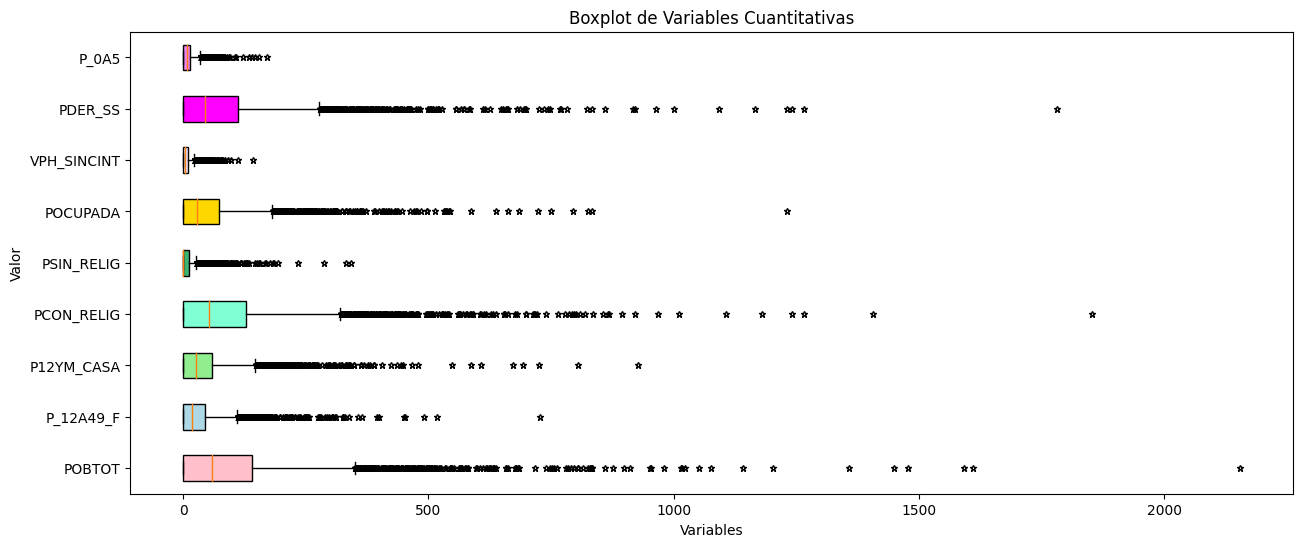

In [ ]:
plt.figure(figsize=(15, 6))
cuanti_bplot = plt.boxplot(subset_cuanti.values, labels=subset_cuanti.columns, vert=False,patch_artist=True, flierprops=dict(marker='*', markersize=5))
colors = ['pink', 'lightblue', 'lightgreen', 'aquamarine', 'mediumseagreen', 'gold', 'lavender', 'fuchsia', 'violet']
for patch, color in zip(cuanti_bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Variables')
plt.ylabel('Valor')
plt.title('Boxplot de Variables Cuantitativas')
plt.show()

In [ ]:
import seaborn as sns

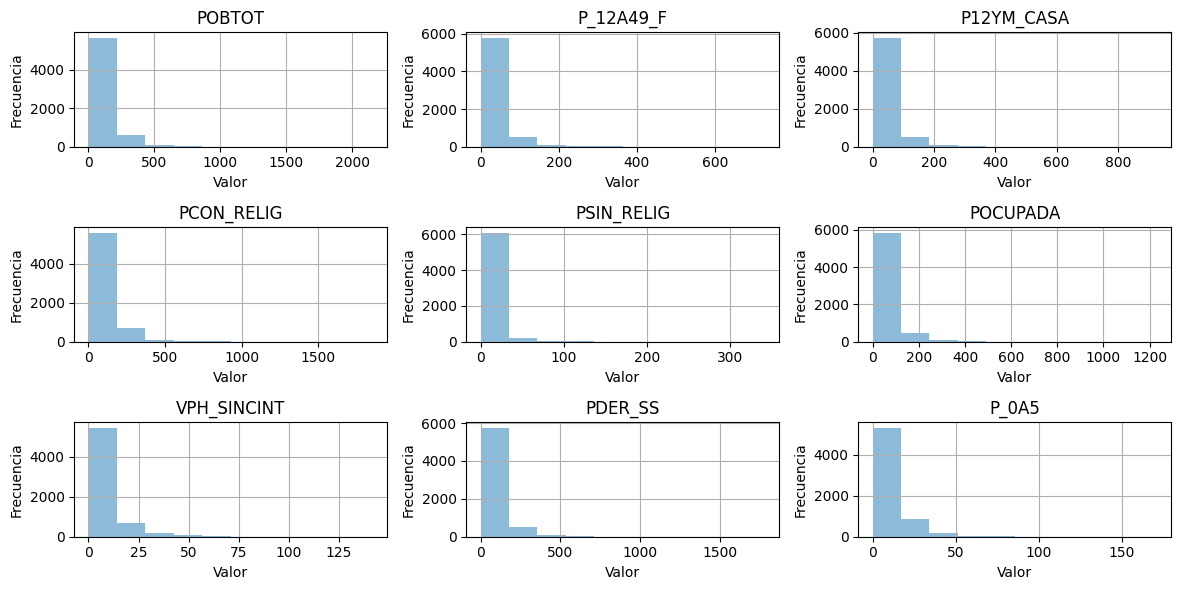

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Iterar sobre las columnas y crear un histograma para cada una
for i, columna in enumerate(subset_cuanti.columns, start=1):
    plt.subplot(3,3,i)  # Configurar el subplot
    plt.hist(subset_cuanti[columna], bins=10, alpha=0.5)  # Crear el histograma
    plt.title(columna)  # Añadir título a cada subplot
    plt.xlabel('Valor')  # Etiqueta del eje x
    plt.ylabel('Frecuencia')  # Etiqueta del eje y
    plt.grid(True)  # Mostrar la cuadrícula

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


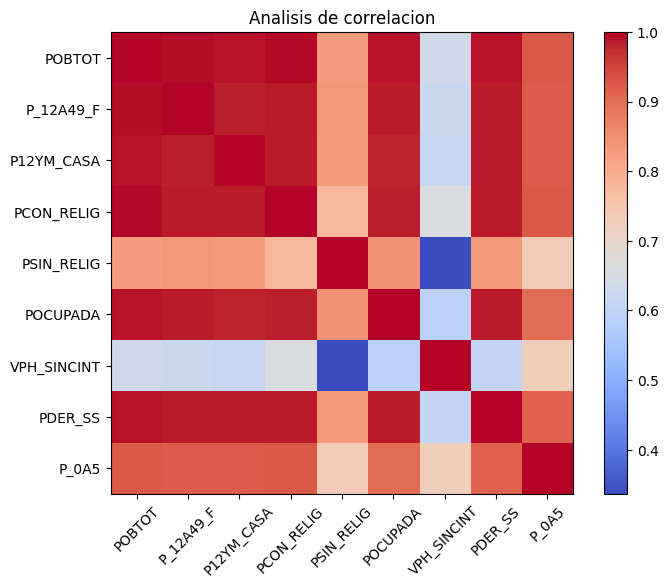

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = subset_cuanti.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()  # Añadir la barra de color
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Analisis de correlacion')
plt.show()

Variables categoricas

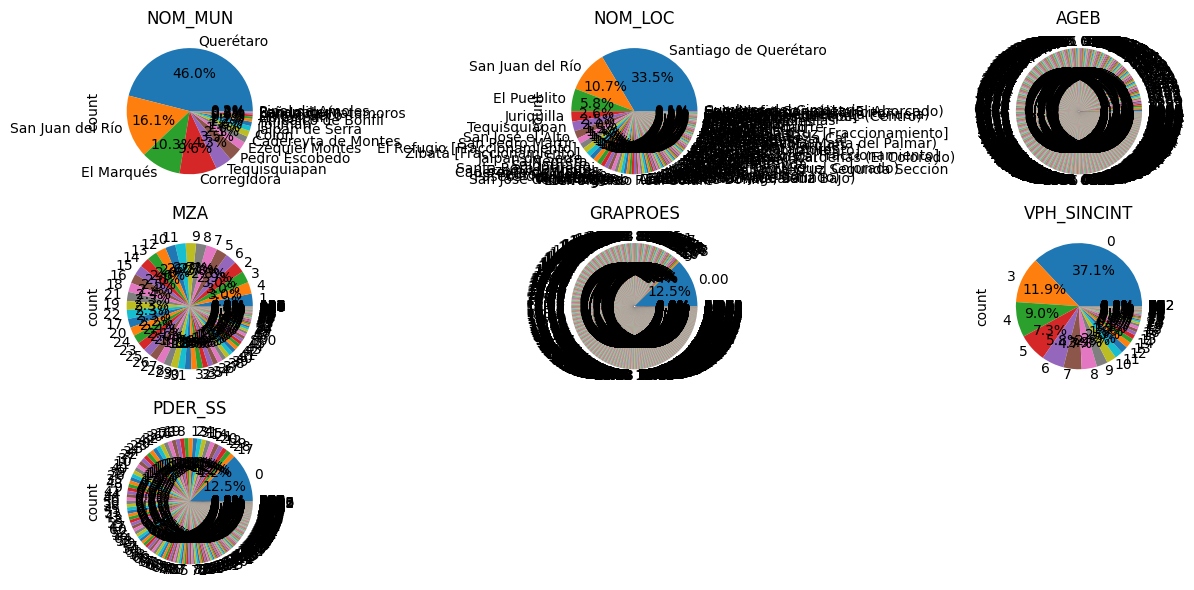

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Iterar sobre las variables y crear un gráfico de pastel para cada una
for i, columna in enumerate(subset_categ.columns[1:], start=1):
    plt.subplot(3, 3, i)  # Configurar el subplot
    subset_categ[columna].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(columna)  # Añadir título a cada subplot

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()
    

In [ ]:
# Crear un diccionario para almacenar las tablas de contingencia
tablas_contingencia = {}

# Iterar sobre cada par de variables y crear la tabla de contingencia correspondiente
for i in range(len(subset_categ.columns)):
    for j in range(i + 1, len(subset_categ.columns)):
        variable1 = subset_categ.columns[i]
        variable2 = subset_categ.columns[j]
        tabla_contingencia = pd.crosstab(subset_categ[variable1], subset_categ[variable2])
        tablas_contingencia[(variable1, variable2)] = tabla_contingencia

# Mostrar las tablas de contingencia
for key, value in tablas_contingencia.items():
    print(f'Tabla de contingencia entre {key[0]} y {key[1]}:')
    print(value)
    print()

Querétaro         1924        2067              416        121   

NOM_MUN    Jalpan de Serra  Landa de Matamoros  Pedro Escobedo  Peñamiller  \
NOM_ENT                                                                      
Querétaro              248                  54             701          38   

NOM_MUN    Pinal de Amoles  Querétaro  San Joaquín  San Juan del Río  \
NOM_ENT                                                                
Querétaro               35       9264           37              3239   

NOM_MUN    Tequisquiapan  Tolimán  
NOM_ENT                            
Querétaro            857      232  

Tabla de contingencia entre NOM_ENT y NOM_LOC:
NOM_LOC    Ajuchitlancito  Ajuchitlán  Alfajayucan  Amazcala  \
NOM_ENT                                                        
Querétaro              32          64           47        57   

NOM_LOC    Amealco de Bonfil  Arcila  Arroyo Seco  Atongo  Bernal  \
NOM_ENT                                                        

### Calidad de los datos

No existen valores incorrectos ni faltas de ortografia en los datos, sin embargo, si hay muchos valores faltantes en la mayoria de las variables, principalmente debido a que se trata de informacion sensible por lo que el acceso a ella es reestringido. 

### Modelo de Datos en UM

In [ ]:
input_1 = 'file_input_uploads/inegi_qro.pdf'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0848c89-aa3f-4842-a14c-1735a6491904' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>